# Tutorial week 4 

# Learning outcomes
1. Gentle introduction to what is computer vision
2. Review: Important concepts of image stored as Numpy array
3. Image cropping
4. Different types of color models: HSV, RGB and CIELAB
    * Split and merge image channels
    * Manipulate the image channels
5. Point operators.

# What is digital image processing / computer vision?

As humans, we perceive the 3D structure of the world around us with ease. For example, looking at a framed group portrait, you can easily count and name all the people in the picture and even guess at their emotions from their facial expressions.

Perceptual psychologists have spent decades trying to comprehend how visual system works and optical illusions have been discovered to solve the puzzle, a complete solution is still far beyond our reach. 

Computer vision / digital image processing is being utilized in diverse of real world applications:
- Optical character recognition (OCR): reading handwritten postal codes on letters and automatic plate recognition.

  ![OCR](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Portable_scanner_and_OCR_%28video%29.webm/1200px--Portable_scanner_and_OCR_%28video%29.webm.jpg "Optical character recognition")
- Medical imaging: registering pre-operative and intra-operative imagery or performing long term studies of internal organ.

  ![CT scan](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRta2V0mlQ-4oVHOUfyhRGpyPm64T4smphtzg&s "CT scans")
- Self-driving vehicles.

  ![Autonomous driving](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdDERoAxq7k7ujdso6ghyI2hm6yn2cK9pJAQ&s "autonomous vehicle")
- Surveillance: monitoring for intruders, analyzing highway traffic and monitoring pools for drowning victims.

  ![surveillance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP9mr_ytNAapxlWafQLG5AcZZKVZ2wgPheFQ&s "surveillance system")
- Fingerprint recognition and biometrics: automatic access authentication as well as forensic applications.

  ![biometrics](https://www.nec.co.nz/wp-content/uploads/2018/02/Close-up-of-womans-left-eye-showing-iris-recogntion-points-market.jpg "iris recognition")

# Setup

In [1]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
from utils import display_images
import matplotlib.pyplot as plt
# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Review: Representation of image as Numpy array
An image is a multidimensional array; it has columns and rows of pixels, and each pixel has a value. For different kinds of image data, the pixel value may be formatted in different ways. We can create a $4\times 4$ square black image from scratch by simply creating a 2D NumPy array as shown in the following cells.

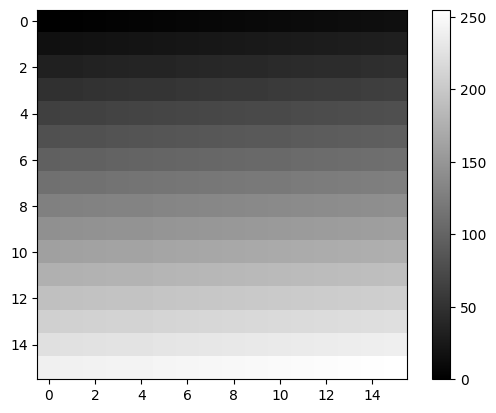

In [2]:
# create a custom array
# grayscale (2D array)
arr = np.arange(0, 256, dtype=np.uint8).reshape((16, 16))
plt.imshow(arr, cmap="gray", vmin=0, vmax = 255)
plt.colorbar()
plt.show()

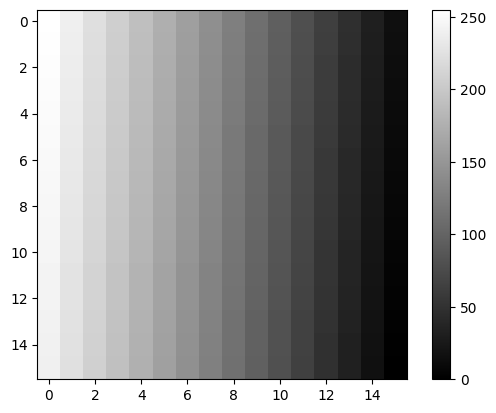

In [3]:
arr_transpose = np.transpose(np.arange(0, 256, dtype='uint8')[::-1].reshape((16, 16)))
plt.imshow(arr_transpose, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()

# change grayscale to RGB

In [4]:
img = np.zeros((4, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Here, each pixel is represented by a single 8-bit integer, which means that the values of each pixel are in 0-255 range, where 0 is black, 255 is white and the in-between values are shades of gray. This is a **grayscale** image. You can use `cv.cvtColor()` to convert the images from one color space to another. We will discuss about image color spaces later.

In [5]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
print(img_bgr.shape)

(4, 4, 3)


**Exercise**
---
1. Create a $200 \times 200$ white image and display it. 
2. Leverage your image processing skills to create a simple wallpaper design as shown in the following image:

![pattern](img_embed/exercise_w4.jpg "Pattern")

### Exercise 1

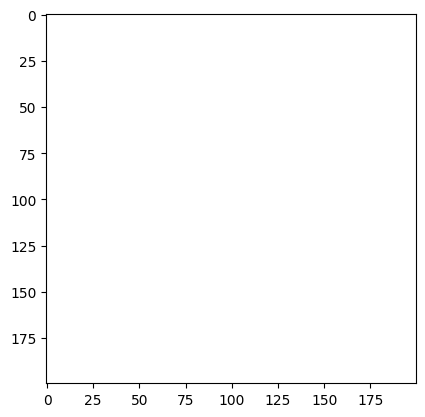

In [7]:
# Create a 200x200 white image and display it

white_image = np.ones((200, 200, 3), dtype=np.uint8) * 255

plt.imshow(white_image)
plt.show()


### Exercise 2

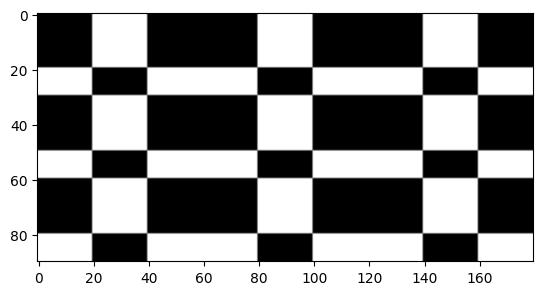

In [8]:
# Leverage your image processing skills to create a simple wallpaper design as shown in the following image:
# create a patch with alernating black and white
tile = np.zeros((30, 60), dtype=np.uint8)
# slice slidepatch to assign new values
tile[:20, 20: 40] = 255
tile[20: 40, :20] = 255
tile[20: 40, 40:] = 255
tile[40: , 20:40] = 255
img = np.tile(tile, (3,3))  # replace the patch by 3 times across the width and height
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()


### Question 3

In [9]:
img = cv.imread("images/flower.jfif")

from utils import display_image
display_image("image", img)

### 3 ways to extract regions from image

1. use mouse click callback funtion (GUI)
2. use cv.selectROI()  #(Region of interest)
3. use external software like Paint

In [10]:
# 1 way: GUI (callback)
def mouse_crop(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ",", y)
        cv.imshow("image", img)

cv.imshow("image", img)
cv.setMouseCallback("image", mouse_crop)
cv.waitKey(0)
cv.destroyAllWindows()

## Access elements in an array

### Indexing and Slicing

In [11]:
arr[2, 2]

34

In [12]:
arr[14, 15]

239

In [13]:
arr[-2, -1]

239

In [14]:
arr[3:6, 3:6]

array([[51, 52, 53],
       [67, 68, 69],
       [83, 84, 85]], dtype=uint8)

In [15]:
img = cv.imread('images/lena.jfif')

%timeit a = img[100, 30, 0]
%timeit b = img.item(100, 30, 0)

115 ns ± 10.7 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
111 ns ± 3.14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Numpy array slicing
### Exercise
2. Extract the region of interest (flower) from the 'flower.jfif'.

# Cropping an image
Why crop an image? 
1. Remove all unwanted objects or areas from an image
2. Improve the overall composition of the image. Visit this [link](https://expertphotography.com/improve-your-composition-the-rule-of-thirds/) on how separating image into grids and putting the subject of interest on the intersection point could create a more compositional pleasing photo. This is known as of rule of thirds.
3. One of the image augmentation techniques in deep learning model training.

The operations are literally the same as extracting ROI.

## Divide an image into smaller patches using cropping
One practical application of cropping in OpenCV is to divide an image into smaller patches. The following example shows how to split image into a $2 \times 3$ grid.

In [16]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_vertical_patches = 2
num_horizontal_patches = 3

# M and N are basically number of pixels per patch
M, N = int(width / num_vertical_patches), int(height / num_horizontal_patches)

x1, y1 = 0, 0

for y in range(0, height, N):
    for x in range(0, width, M):
        
        x1 = y + M
        y1 = x + N
        
        if x1 >= width and y1 >= height:
            x1 = width - 1  # -1 because of indexing 
            y1 = height - 1
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
            
        elif y1 >= height:
            y1 = height - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        elif x1 >= width:
            x1 = width - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise
1. Divide the image into 4 equal regions. Swap their positions as shown below:

   ![dog_swap](img_embed/crop_swap.PNG "dog")
2. Cover the face of lena with white mask as shown as the following:

   ![lena_mask](img_embed/lena_mask.PNG "lena mask")

3. Extract the region of interest (flower) from the 'flower.jfif'.

# Color space / color model
In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of 3 components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white. RGB is considered an "additive" color space, and colors can be imagined as being produced from shining quantities of red, blue and green light onto a black background.

There are so many color spaces because different color spaces are useful for different purposes. We will typically work with 3 kinds of color models: blue-green-red (BGR), grayscale and hue-saturation-value (HSV).

In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. 

## RGB color space
It is an additive colorspace where colors are obtained by a linear combination of Red, Green and Blue values. 

There are some inherent problems asociated with RGB colorspace:
- significant perceptual non-uniformity.
- mixing of chrominance and luminance data.

## LAB color space
3 components:
- L: lightness (intensity).
- A: color component ranging from green to red.
- B: color component ranging from blue to yellow.

The L component is independent of color information and encodes brightness only. 

## YCrCb color space
Like LAB colorspace, the luminance and chrominances are separated into different channels. Y is used to represent luminance (or luma), Cb represents blue-difference, and Cr represents red-difference.

## HSV color space
1. Hue is the color attribute that describes pure color. 
2. Saturation is the quantity that reflect the degree to which pure color is diluted by white light.
3. Value or intensity is brightness.

![hsv cylindrical spectrum](img_embed/hsv_cylindrical.jfif "HSV")

> **Important** 🗝️
>
> In OpenCV, hue range is $[0,179]$, saturation range is $[0,255]$, and value range is $[0,255]$. Different software use different scales. So if you are comparing OpenCV values with them, you need to **normalize these ranges**. 
> The important takeaway is: *Lighting condition can mean the difference between success and failure of your computer vision algorithm.* Thus, color space which could factor out luminance into different channel should be the choice.

### manipulate HSV channels

In [17]:
img = cv.imread("images/car.jpg")

# change BGR to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# split the channels
h, s, v = cv.split(img_hsv)

# set a constant for H channel [0-179]
h_bias = 25
h_new = np.zeros_like(h) + h_bias
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img, transform_display], ("original", f"hue={h_bias}"))

In [18]:
# saturation
h, s, v = cv.split(img_hsv)

# set a constant for s channel [0-255]
s_bias = 255
s_new = np.zeros_like(s) + s_bias
s_new = np.uint(s_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

# from utils import display_images
display_images([img, transform_display], ("original", f"saturation={s_bias}"))


## Splitting and merging Image channels
The B, G and R channels can be split into their individual planes when needed. Then the individual channels can be merged back together to form BGR image again. The splitting and merging operations can be attained by the following functions respectively:
* `cv.split(m)`, where m is a multi-channel array.
* `cv.merge(mv)`, where mv is a tuple / list of matrices to be merged; all the matrices in mv must have the same size and the same depth (precision of each pixel).

In [20]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

print(f"Are the two images the same? {np.equal(img, img_merge).all()}")

Are the two images the same? True


## Manipulate image channels

### HSV color channels

#### Hue channel

In [27]:
# set the hue to a certain value
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
h_new = np.zeros_like(h) + 30
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "hue=30"))

In [28]:
# change the saturation 
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
s_new = np.zeros_like(s) + 255
s_new = np.uint8(s_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "saturation decrease"))

### Exercise
1. Display the blue, green and red channel of the **lena** image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

![exercise_fig](img_embed/diff_color_channels.jpg "color dogs")

In [20]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

colors = ("blue", "green", "red")
channels = cv.split(img)

for i, channel in enumerate(channels):
    new_channel = np.zeros_like(channel) + 255
    new_channel = np.uint8(new_channel)
    img_copy = img.copy()
    img_copy[..., i] = new_channel
    cv.imshow(colors[i], img_copy)

cv.waitKey(0)
cv.destroyAllWindows()

# Point operator 

## Point operator
It is merely mathematical operations on each pixel value of an image. The formula is as follows:
$$f(x, y) = \alpha f(x, y) + \beta$$

In [23]:
np.uint([-1, 0, 255, 256, 257])

array([4294967295,          0,        255,        256,        257],
      dtype=uint32)

In [24]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image (uint8)
    alpha, beta: user defined parameters
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
# Load am image to change its brightness
img = cv.imread("images/camera.jpg")
alpha = 1.2  # increase contrast (>1)
beta = 30    # increase brightness (>0)
dst = point_op(img, alpha=alpha, beta=beta)

display_images([img, dst], ("original", "pixel transform"))

### Enhance the contrast and brighten the image

In [26]:
gray = cv.imread('images/camera.jpg', 0)
transform = point_op(gray, 2, 0)

display_images([gray, transform], ("grayscale", "transform"))

### Lower the contrast and darken the image

In [27]:
transform2 = point_op(gray, 1, -50)

display_images([gray, transform2], ("grayscale", "darken"))

## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

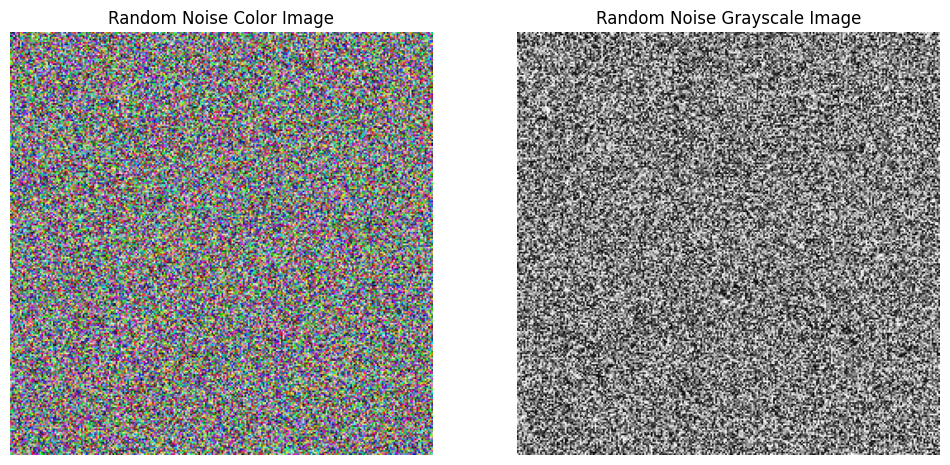

In [25]:
# Create a random noise color and grayscale image. 
import numpy as np
import matplotlib.pyplot as plt

# Define dimensions for the images
width, height = 256, 256  # Example dimensions, total pixels = 256 * 256

# Create a random noise color image (3 channels for RGB)
color_image = np.random.rand(height, width, 3)

# Create a random noise grayscale image (1 channel)
grayscale_image = np.random.rand(height, width)

# Display the images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(color_image)
axs[0].set_title('Random Noise Color Image')
axs[0].axis('off')

axs[1].imshow(grayscale_image, cmap='gray')
axs[1].set_title('Random Noise Grayscale Image')
axs[1].axis('off')

plt.show()


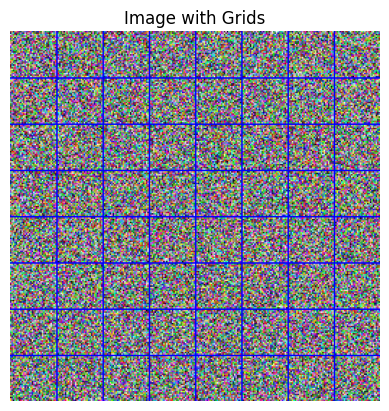

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(255, 0, 0)):
    """
    Divides an image into smaller patches using cropping and overlays a grid on the image.
    
    Parameters:
        img (numpy.ndarray): The source image.
        num_horizontal_grid (int): The number of patches along the x-axis.
        num_vertical_grid (int): The number of patches along the y-axis.
        line_color (tuple): The color of the grid lines (B, G, R).
    
    Returns:
        numpy.ndarray: The image with grids overlaid.
    """
    # Get the image dimensions
    height, width = img.shape[:2]
    
    # Calculate the size of each grid cell
    cell_width = width // num_horizontal_grid
    cell_height = height // num_vertical_grid
    
    # Create a copy of the image to draw grids
    img_with_grids = img.copy()
    
    # Draw horizontal grid lines
    for i in range(1, num_vertical_grid):
        y = i * cell_height
        cv2.line(img_with_grids, (0, y), (width, y), line_color, 1)
    
    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * cell_width
        cv2.line(img_with_grids, (x, 0), (x, height), line_color, 1)
    
    return img_with_grids

# Example usage
# Create a random noise color image for demonstration
height, width = 256, 256
color_image = (np.random.rand(height, width, 3) * 255).astype(np.uint8)

# Number of grids along x and y axes
num_horizontal_grid = 8
num_vertical_grid = 8

# Color of the grid lines (in BGR format)
line_color = (255, 0, 0)  # Red

# Get the image with grids
img_with_grids = crop_grid(color_image, num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grids
plt.imshow(cv2.cvtColor(img_with_grids, cv2.COLOR_BGR2RGB))
plt.title('Image with Grids')
plt.axis('off')
plt.show()


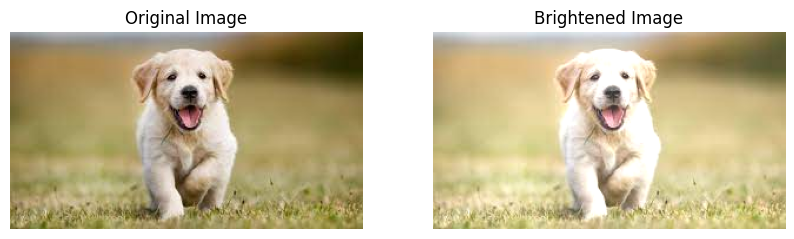

In [29]:
#Q3

#METHOD 1: Use simple addition/ substraction

def change_brightness_add_subtract(img, value):
    """
    Change the brightness of an image by adding or subtracting a constant value to/from pixel values.
    
    Parameters:
        img (numpy.ndarray): The source image.
        value (int): The value to be added (positive for increasing brightness, negative for decreasing brightness).
    
    Returns:
        numpy.ndarray: The image with adjusted brightness.
    """
    # Convert the image to float32 for precise addition/subtraction
    img_float = img.astype(np.float32)
    
    # Add/subtract the value
    img_bright = img_float + value
    
    # Clip the values to keep them in the valid range [0, 255]
    img_bright = np.clip(img_bright, 0, 255)
    
    # Convert back to uint8
    return img_bright.astype(np.uint8)

# Load an example image
img = cv2.imread('images/dog.jfif')

# Change brightness
bright_img = change_brightness_add_subtract(img, 50)

# Display the original and brightened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.axis('off')

plt.show()

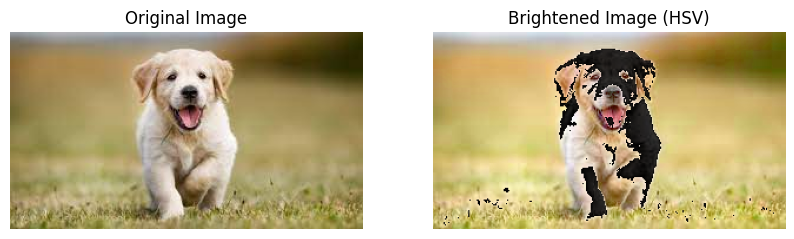

In [30]:
#Q3 Method 2: Using HSV Color Space
import cv2
import numpy as np
import matplotlib.pyplot as plt

def change_brightness_hsv(img, value):
    """
    Change the brightness of an image by adjusting the Value (brightness) channel in HSV color space.
    
    Parameters:
        img (numpy.ndarray): The source image.
        value (int): The value to be added (positive for increasing brightness, negative for decreasing brightness).
    
    Returns:
        numpy.ndarray: The image with adjusted brightness.
    """
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Add/subtract the value to/from the Value channel
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] + value, 0, 255)
    
    # Convert back to BGR color space
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Load an example image
img = cv2.imread('images/dog.jfif')

# Change brightness
bright_img_hsv = change_brightness_hsv(img, 50)

# Display the original and brightened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bright_img_hsv, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image (HSV)')
plt.axis('off')

plt.show()



# Q4. Provide at least one common use cases for the following color spaces:
1. RGB: Digital Displays
2. HSV: Color Selection and Editing
3. CIELAB: Color Correction and Matching